# <b>Exame Final — Época Normal 2020/21</b>

## Normas

1. Podem ser consultadas: <br>
(a) Resoluções pessoais das aulas teórico-praticas e trabalhos para casa.<br>
(b) Páginas de manuais de $\texttt{Python}$ na internet. <br>
(c) O livro adoptado ou páginas de wikipedia. <br>
(d) O Stack Exchange ou páginas similares para auxílio na resolução de erros. <br>

2. O notebook entregue deverá perante um “Restart & Run All” correr sem erros de sintaxe em menos de 4min. 

3. O incumprimento destas regra leva ao anulamento do exame ou da alínea por decisão do corrector. 

4. Todas as opções e algoritmos devem ser cuidadosamente explicados. As explicações podem ser apresentada em $\LaTeX$ ou em comentário.

# 1.1

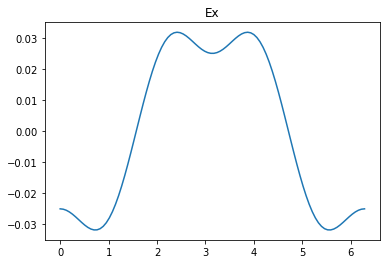

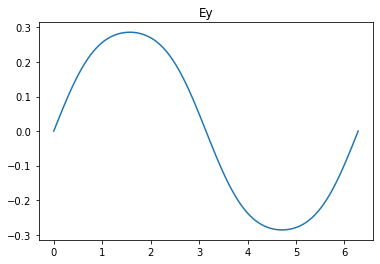

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import scipy.linalg as sp


# Com N iterações, N+1 elementos
def simpson(a, b, N, x, y, f):
		h = (b - a) / N
		f_values = f(x, y, np.linspace(a, b, N + 1))
		return h / 3 * np.sum(4 * f_values[1::2] + f_values[2::2] + f_values[:-1:2])
    
def fx(x, y, theta):
    up = np.cos(theta)**4 * (x - np.cos(theta))
    down = ((x - np.cos(theta))**2 + (y - np.sin(theta))**2 + 1)**1.5
    return up / down

def fy(x, y, theta):
    up = np.cos(theta)**4 * (y - np.sin(theta))
    down = ((x - np.cos(theta))**2 + (y - np.sin(theta))**2 + 1)**1.5
    return up / down
    
def Ex(x, y, n = 1000):
    return simpson(0, 2 * np.pi, n, x, y, fx)

def Ey(x, y, n = 1000):
    return simpson(0, 2 * np.pi, n, x, y, fy)


r = 0.5
theta_list = np.linspace(0, 2 * np.pi, 100)

Ex_list = np.empty(100, float)
Ey_list = np.empty(100, float)
for i, theta in enumerate(theta_list):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    Ex_list[i] = Ex(x,y)
    Ey_list[i] = Ey(x,y)

plt.plot(theta_list, Ex_list)
plt.title("Ex")
plt.show()
plt.plot(theta_list, Ey_list)
plt.title("Ey")
plt.show()
    
    

# 1.2

Para uma função genérica o erro cai linearmente com a diminuição de $h^4$. Vamos estudar com a dependência em n, sabendo que este tem uma dependência inversa de h.

[1.4635387669607405e-05, 3.658859404361466e-06, 3.1217399036146766e-12, 3.7007434154171884e-18, 7.401486830834377e-18, 0.0, 3.7007434154171884e-18]


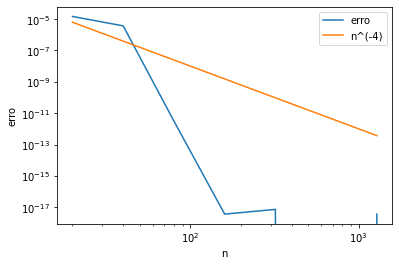

In [86]:
n_list = np.array([20, 40, 80, 160, 320, 640, 1280])
error_list = []
n = 10
E1 = Ey(0, 0.5, n)
for n in n_list:
    E2 = Ey(0, 0.5, n)
    error = 1 / 15 * abs(E2 - E1)
    error_list.append(error)
    E1 = E2

print(error_list)
plt.plot(n_list, error_list, label="erro")
plt.plot(n_list, (1 / n_list)**(4), label="n^(-4)")
plt.xlabel("n")
plt.ylabel("erro")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

# 1.3 a

In [65]:
def binary_search(x1, x2 , f):
    p = 1e-8
    f1 = f(x1, 0)
    while abs(x2 - x1) > p:
        average = (x1 + x2) / 2
        f_average = f(average, 0)
        if f_average * f1 > 0:
            x1 = average
            f1 = f_average
        else:
            x2 = average
    return (x2 + x1) / 2

print("Coordenada x dos pontos de equilíbrio:")
x0 = binary_search(-0.5, 0.5, Ex)
print(round(x0,8))
x1 = binary_search(0, 1, Ex)
print(round(x1,8))
x2 = binary_search(-0.1, -1, Ex)
print(round(x2,8))

Coordenada x dos pontos de equilíbrio:
-0.0
0.57862793
-0.57862793


# 1.3 b

Os pontos de equilíbrio são os com x diferente de 0. Nesses 2 casos as forças são restauradoras, dado que a carga da partícula é negativa.

In [71]:
dx = 1e-3
x_list=[x0,x1,x2]

for x in x_list:
    print("ponto de equilíbrio x = " + str(x))
    Ex_plus  = Ex(x + dx, 0)
    Ex_minus = Ex(x - dx, 0)
    print("Ex para x + dx = " + str(Ex_plus))
    print("Ex para x - dx = " + str(Ex_minus))
    print("")

ponto de equilíbrio x = -3.725290298461914e-09
Ex para x + dx = -0.00020825871217578705
Ex para x - dx = 0.00020826026382018116

ponto de equilíbrio x = 0.5786279328167439
Ex para x + dx = 0.0003863673640444416
Ex para x - dx = -0.0003846563089268005

ponto de equilíbrio x = -0.5786279309540988
Ex para x + dx = 0.0003846570238152392
Ex para x - dx = -0.00038636664278984486



# 1.3 c

Ambos os pontos não são estáveis na direção yy, pois o campo elétrico tem o mesmo sinal para desvios positivos e negativos.

In [73]:
dy = 1e-3
x_list=[x1,x2]

for x in x_list:
    print("ponto de equilíbrio x = " + str(x))
    Ey_plus  = Ex(x, dy)
    Ey_minus = Ex(x, -dy)
    print("Ex para + dy = " + str(Ey_plus))
    print("Ex para - dy = " + str(Ey_minus))
    print("")

ponto de equilíbrio x = 0.5786279328167439
Ex para + dy = 1.363083286521124e-07
Ex para - dy = 1.3630832868187556e-07

ponto de equilíbrio x = -0.5786279309540988
Ex para + dy = -1.355902571046454e-07
Ex para - dy = -1.355902571046454e-07



# 1.4

In [115]:
def f(r, t):  # exemplo de função
    x, vx, y, vy = r
    fx = vx
    fvx = - Ex(x, y)
    fy = vy
    fvy = - Ey(x, y)
    return np.array([fx, fvx, fy, fvy], float)


def runge_kutta_4(n, x0, vx0, y0, vy0):
    t_max = 300
    t_min = 0
    h = (t_max - t_min) / n  # espaçamento temporal
    t_values = np.linspace(t_min, t_max, n+1)  # lista com os valores do tempo
    r = np.array([x0, vx0, y0, vy0], float)  # condições iniciais
    r_values = np.empty([n+1, 4], float)  # array para armazenar a solução e a derivada para os diferentes t's
    for i, t in enumerate(t_values):
        r_values[i] = r  # guardar o valor calculado
        
        # calcular o valor seguinte com o método de runge-kuta-4
        k1 = h * f(r, t)
        k2 = h * f(r + k1/2, t + h/2)
        k3 = h * f(r + k2/2, t + h/2)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t_values, r_values

# 1.4 a

Podia fazer o gráfico das diferenças para 1000 e 5000 pontos mas não tenho tempo. Pela análise dos gráficos, para 1000 e para 5000 pontos eles já são (praticamente) iguais. Assim, para 1000 pontos o método já converge.

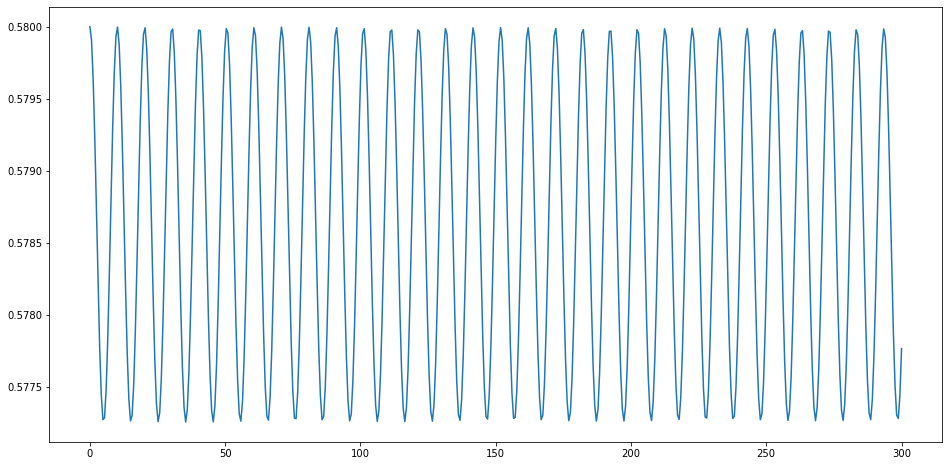

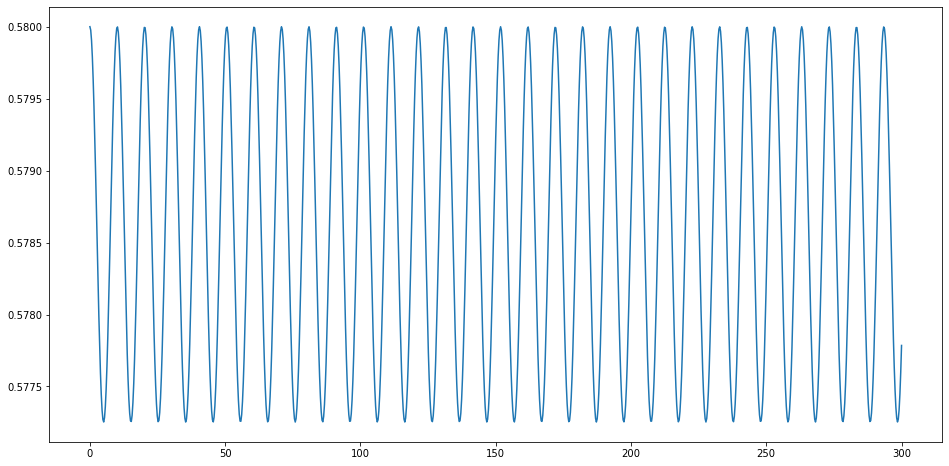

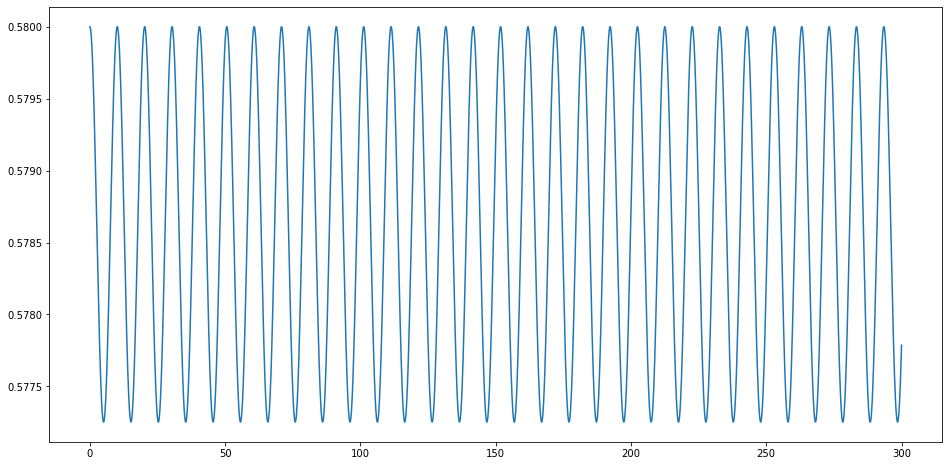

In [116]:
t_list, r0 = runge_kutta_4(500, 0.58, 0, 0.001, 0)
plt.figure(figsize=(16,8))
plt.plot(t_list, r0[:, 0])
plt.show()

t_list, r1 = runge_kutta_4(1000, 0.58, 0, 0.001, 0)
plt.figure(figsize=(16,8))
plt.plot(t_list, r1[:, 0])
plt.show()

t_list, r2 = runge_kutta_4(5000, 0.58, 0, 0.001, 0)
plt.figure(figsize=(16,8))
plt.plot(t_list, r2[:, 0])
plt.show()

# 1.4 b

Do 1º para o 2º, como v é proximo, nota-se apenas uma diferença de fase, devida à posição inicial ser diferente. Em relação ao 3º, o qual tem uma velocidade bem maior, nota-se que a freqência diminuiu, ou seja, que o periodo aumentou.

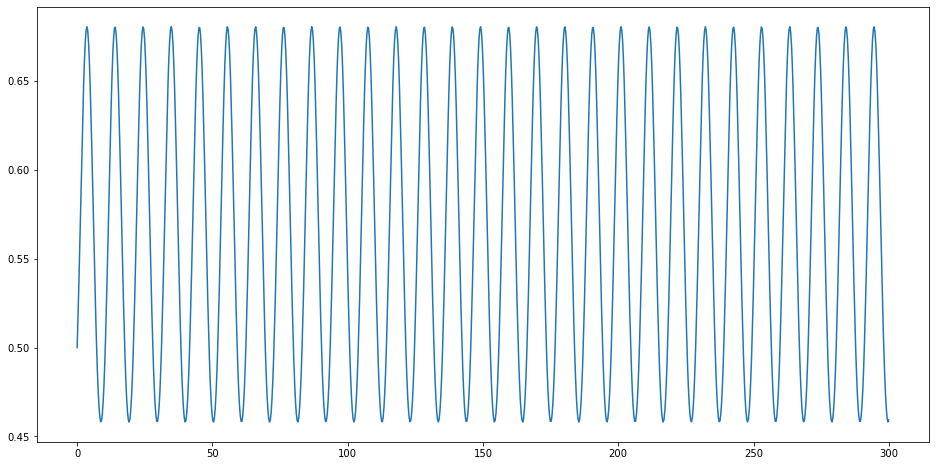

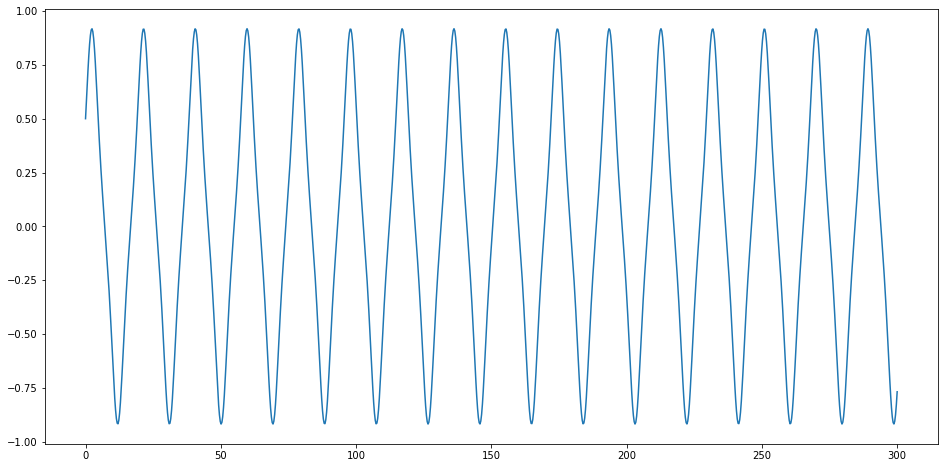

In [117]:
t_list, r_2 = runge_kutta_4(1000, 0.5, 0.05, 0, 0)
plt.figure(figsize=(16,8))
plt.plot(t_list, r_2[:, 0])
plt.show()

t_list, r_3 = runge_kutta_4(1000, 0.5, 0.25, 0, 0)
plt.figure(figsize=(16,8))
plt.plot(t_list, r_3[:, 0])
plt.show()

# 1.4 c

para o 1º caso só se encontra um pico em 0, estava à espera de encontrar para uma frequência superior. para o 2º verifica-se que tem outro pico, ou seja é composto por 2 sinais de frequências diferentes. O 3º por 2 picos, mas o pico já não é em 0. Por esta análise descobrimos porque sinais de que frequências são compostos cada caso. o 1º é por 1 sinal só. O 2º é por 2 e o 3º por 2 tmb.

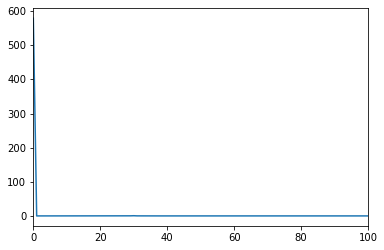

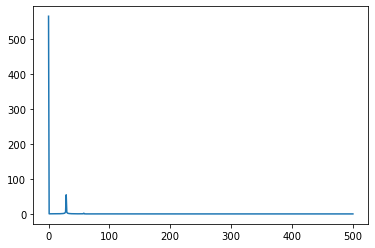

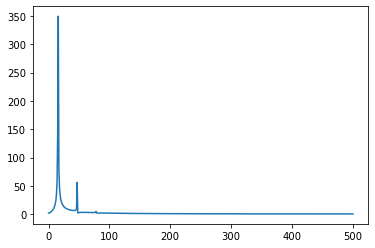

In [120]:
coeficientes0 = np.fft.rfft(r1[:, 0])
coeficientes1 = np.fft.rfft(r_2[:, 0])
coeficientes2 = np.fft.rfft(r_3[:, 0])

# tinha de fz plot com metade destes pontos devido a estar a usar a rfft
w_max = 2 * np.pi / (t_list[1] - t_list[0])
w_list = np.linspace(0, w_max, len(t_list))

plt.plot(abs(coeficientes0))
plt.xlim(0, 100)
plt.show()

plt.plot(abs(coeficientes1))
plt.show()

plt.plot(abs(coeficientes2))
plt.show()